<a href="https://colab.research.google.com/github/raphaeltsuchiya/statistics/blob/main/trabalho_final_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTALANDO BIBLIOTECA PANDAS PYTHON

In [80]:
!pip install pandas

In [81]:
import pandas as pd

## CARREGANDO OS DADOS DO KAGGLE REFERENTE A GORDURA CORPORAL:

In [82]:
# df = pd.read_csv('C:/Users/gabri/OneDrive/Área de Trabalho/bodyfat.csv')
df = pd.read_csv('/content/bodyfat.csv')

# Questão 1

Utilizando seus conhecimentos em Estatística Descritiva, forneça algumas análises
sobre as colunas que julgar mais relevantes do dataset

In [83]:
# Funções de apoio
converte_massa = lambda x: 0.45*x
converte_altura = lambda x: 2.54*x

def calcula_imc(massa, altura):
  return massa/((altura/100)**2)

In [112]:
# Conversão para sistema internacional e cálculo de IMC
df['Weight_SI'] = df.Weight.apply(converte_massa)
df['Height_SI'] = df.Height.apply(converte_altura)
df['IMC'] = calcula_imc(df.Weight_SI, df.Height_SI)
dados = df.copy()

In [113]:
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Weight_SI,Height_SI,IMC,residual
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,69.4125,172.085,23.439679,-6.850794
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,77.9625,183.515,23.149554,-13.050794
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,69.3000,168.275,24.473385,6.149206
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,83.1375,183.515,24.686176,-8.750794
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,82.9125,180.975,25.315286,9.549206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,60.4125,170.180,20.859782,-8.150794
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,90.4500,177.165,28.817262,14.449206
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,84.0375,167.640,29.903211,10.149206
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,85.8375,179.070,26.768953,6.849206


## a) Para as colunas que você escolher, mostre-me as métricas de posição e de dispersão que julgar interessantes.

In [86]:
body_fat = df.iloc[:, 2]
media_body_fat =  body_fat.mean()
mediana_body_fat = body_fat.median()
variancia_body_fat = body_fat.var()
desvio_padrao_body_fat = body_fat.std()

print(f'Média da gordura corporal das pessoas no dataset: {media_body_fat}')
print(f'Mediana da gordura corporal das pessoas no dataset: {mediana_body_fat}')
print(f'Variância da gordura corporal das pessoas no dataset: {variancia_body_fat}')
print(f'Desvio Padrão da gordura corporal das pessoas no dataset: {desvio_padrao_body_fat}')


Média da gordura corporal das pessoas no dataset: 44.88492063492063
Mediana da gordura corporal das pessoas no dataset: 43.0
Variância da gordura corporal das pessoas no dataset: 158.81140517295893
Desvio Padrão da gordura corporal das pessoas no dataset: 12.602039722717864


## b) Faça um pré-julgamento a respeito das colunas deste dataset tentando encontrar um par de colunas que, pela lógica, deve ser altamente correlacionado e outro par de colunas que, pela lógica, deve ser fracamente correlacionado. Depois utilize as métricas de correlação que você aprendeu para pôr à prova essas suas opiniões, isto é, para descobrir se matemática confirma suas crenças iniciais ou não

Acredita-se que exista uma forte correlação entre a circunferência abdominal e a gordura corporal. Assim como regiões que acumulem menos gordura, como por exemplo punhos e tornozelos, possua uma correlação menor


In [88]:
bf_abdomen = df[['BodyFat','Abdomen']].copy()
bf_ankle = df[['BodyFat','Ankle']].copy()
bf_wrist = df[['BodyFat','Wrist']].copy()

Gordura Corporal x Abdomen

In [89]:
bf_abdomen.corr(method='kendall')

,BodyFat,Abdomen
BodyFat,1.000000,0.621092
Abdomen,0.621092,1.000000


In [90]:
bf_abdomen.corr(method='pearson')

,BodyFat,Abdomen
BodyFat,1.000000,0.813432
Abdomen,0.813432,1.000000


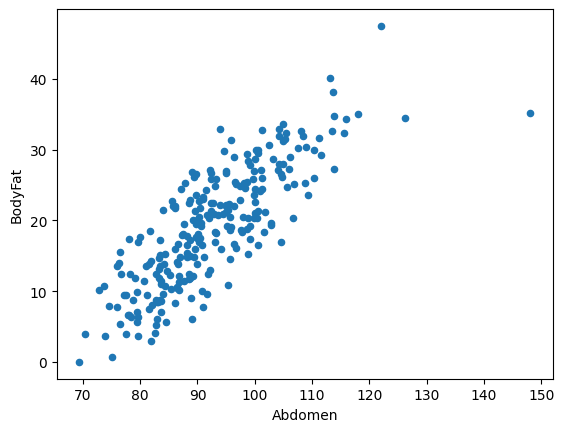

In [91]:
bf_abdomen.plot(kind='scatter', x='Abdomen', y='BodyFat');

Gordura Corporal x Punhos e Tornozelos

In [92]:
bf_ankle.corr(method='kendall')

,BodyFat,Ankle
BodyFat,1.000000,0.207587
Ankle,0.207587,1.000000


In [93]:
bf_ankle.corr(method='pearson')

,BodyFat,Ankle
BodyFat,1.00000,0.26597
Ankle,0.26597,1.00000


In [94]:
bf_wrist.corr(method='kendall')

,BodyFat,Wrist
BodyFat,1.00000,0.21648
Wrist,0.21648,1.00000


In [95]:
bf_wrist.corr(method='pearson')

,BodyFat,Wrist
BodyFat,1.000000,0.346575
Wrist,0.346575,1.000000


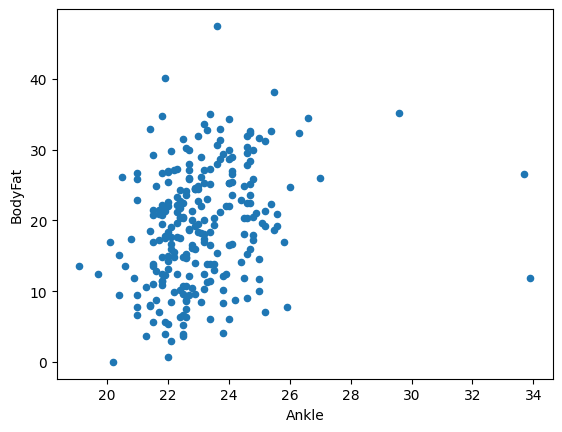

In [96]:
bf_ankle.plot(kind='scatter', x='Ankle', y='BodyFat');

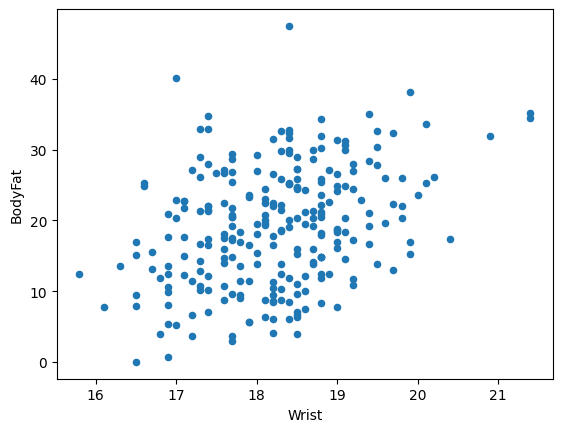

In [97]:
bf_wrist.plot(kind='scatter', x='Wrist', y='BodyFat');

Podemos observar que a constatação inicial se manteve, havendo uma correlação maior entre gordura corporal x abdomen e uma correlação quase inexistente para punhos e tornozelos.

## c) Escolha pelo menos uma coluna que siga a distribuição normal, plote um boxplot e explique como você fez para concluir que esta coluna segue uma distribuição normal.

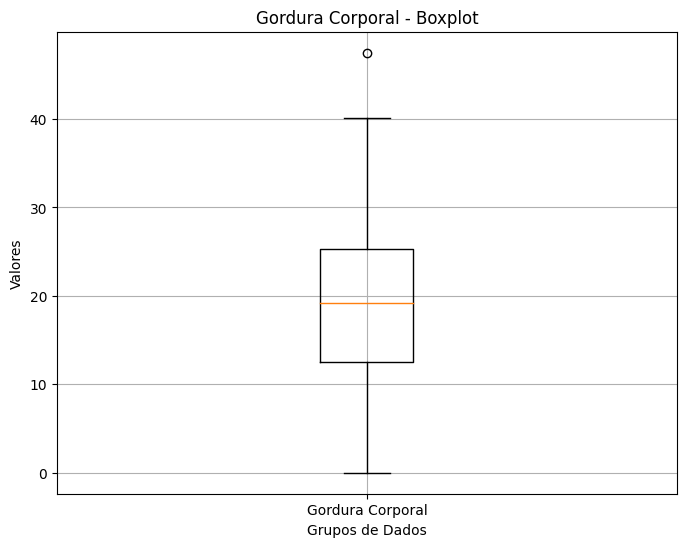

In [120]:
import matplotlib.pyplot as plt
import numpy as np

bf = df[['BodyFat']]

plt.figure(figsize=(8, 6))
plt.boxplot(bf)

# Adicionando título e rótulos
plt.title('Gordura Corporal - Boxplot')
plt.xlabel('Grupos de Dados')
plt.ylabel('Valores')

# Adicionando rótulos aos grupos de dados
plt.xticks([1], ['Gordura Corporal'])

# Exibindo o boxplot
plt.grid(True)
plt.show()

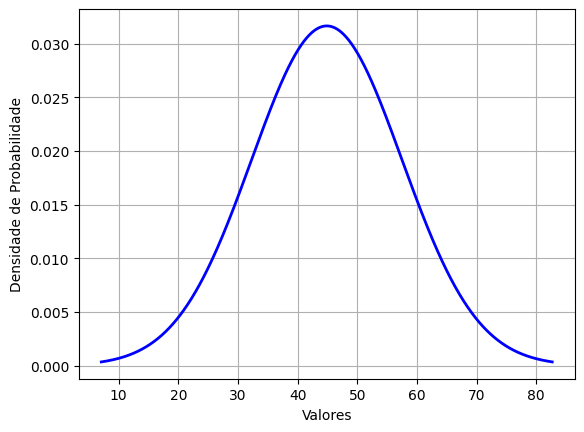

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
mu = media_body_fat
sigma = desvio_padrao_body_fat
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y, 'b-', linewidth=2)
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.grid(True)
plt.show()

Um dos indicadores de que os dados estão distribuidos na forma normal é que a Média e a Mediana possuem valores iguais ou bem parecidos

# Questão 2

Considerando o mesmo dataset e tomando-o como espaço amostral, responda:
(ps.: fique à vontade para usar o Python para facilitar a sua vida aqui):

## a) Probabilidade de uma pessoa ter mais de 40 anos

In [98]:
#(dividimos o número de pessoas com idade superior a 40 pelo total de pessoas no dataset) 160 / 252 = 63.49%
prob_idade_sup_40 = len(df[df['Age'] > 40]) / len(df)
print(prob_idade_sup_40)

0.6349206349206349


## b) Probabilidade de uma pessoa ter um percentual de gordura corporal superior a 20%

In [99]:
#(dividimos o número de pessoas com percentual de gordura corporal superior a 20% pelo total de pessoas) 120 / 252 = 47.62%

prob_gorCorp_sup_20 = len(df[df['BodyFat'] > 20]) / len(df)
print(prob_gorCorp_sup_20)

0.47619047619047616


## c) Probabilidade de uma pessoa ter ambos, mais de 40 anos e um percentual de gordura corporal superior a 20%

In [100]:
# (dividimos o número de pessoas que atendem a ambas as condições pelo total de pessoas) 88 pessoas / 252 = 34.92%
prob_ambas_condições = len(df[(df['Age'] > 40) & (df['BodyFat'] > 20)]) / len(df)
print(prob_ambas_condições)

0.3492063492063492


## d) Probabilidade condicional: Percentual de gordura corporal superior a 20%, dado que a pessoa tem mais de 40 anos

In [101]:
#(dividimos o número de pessoas que atendem a ambas as condições pelo número de pessoas com mais de 40 anos).
#Essas 88 pessoas representam 55% do total de 160 pessoas com mais de 40 anos
prob_gorCorp_sup_20_dado_idade_sup_40 = len(df[(df['Age'] > 40) & (df['BodyFat'] > 20)]) / len(df[df['Age'] > 40])
print(prob_gorCorp_sup_20_dado_idade_sup_40)

0.55


# Questão 3

Durante o módulo, nós definimos algumas distribuições de probabilidade, cada uma
com uma função de probabilidade.

## a) Escolha uma delas que não seja uma distribuição normal, e explique (talvez com algum exemplo) que tipos de evento esta distribuição descreve.

Uma distribuição de probabilidade que não seja a distribuição normal e que é frequentemente usada é a distribuição binomial. Esta distribuição descreve o número de sucessos em uma sequência de n ensaios independentes de Bernoulli (ou seja, experimentos que resultam em sucesso ou fracasso) com a mesma probabilidade de sucesso em cada tentativa.

Exemplo: Se jogarmos uma moeda justa 10 vezes, a distribuição binomial pode nos dizer a probabilidade de obtermos exatamente 6 caras. Aqui, cada lançamento da moeda é um ensaio de Bernoulli (sucesso = cara, fracasso = coroa), com a probabilidade de sucesso (obter cara) sendo 0,5 em cada lançamento.

## b) Explique a utilidade prática das funções de probabilidade. Quero dizer: para quê elas servem? De que modo elas nos ajudam?

As funções de probabilidade são fundamentais para modelar e entender fenômenos aleatórios. Elas nos permitem quantificar a incerteza e fazer previsões sobre eventos futuros com base em dados observados. No contexto da estatística, as funções de probabilidade são usadas para:

Tomada de Decisões: Fornecer uma base quantitativa para tomar decisões em situações de incerteza.

Inferência Estatística: Estimar parâmetros da população, testar hipóteses e construir intervalos de confiança.

Modelagem de Eventos: Modelar a ocorrência de eventos no mundo real e entender suas distribuições.

## c) Escolha uma das colunas do nosso dataset que sejam contínuas e que sigam uma distribuição normal, e calcule a probabilidade de uma pessoa escolhida ao acaso ter um valor > x para esta coluna (por exemplo, probabilidade de neck ser maior que 45). Mas, atenção: faça isso usando z-scores, através da função st.norm.cdf, do pacote Python scipy.stats.


Por exemplo, se quisermos calcular a probabilidade de a circunferência do pescoço (Neck) ser maior que 45 cm, assumindo que Neck segue uma distribuição normal

## INSTALANDO BIBLIOTECA INSTALL SCIPY

In [102]:
!pip install scipy

In [103]:
from scipy.stats import norm

#desvio padão da coluna NECK
mean_neck = 38
std_neck = 2

x = 45

#calculando o z-score para x
z_score = (x - mean_neck) / std_neck

#calculando a probabilidade do 'pescoço' ser maior que x
probabilidade_maior_x = 1 - norm.cdf(z_score)

print(f"A probabilidade do 'pescoço' ser maior que {x} é: {probabilidade_maior_x }")

A probabilidade do 'pescoço' ser maior que 45 é: 0.0002326290790355401


# Questão 4

Escolha uma coluna de valores contínuos A que seja do seu interesse. Depois disso, filtre os registros da sua tabela usando uma segunda coluna B. E, por fim, valendo-se dos seus conhecimentos sobre p-valor, diga se a média de A antes da filtragem é de fato significativamente diferente da média dos valores de A pós filtragem, com um nível de confiança de 95%. Por exemplo: a coluna BodyFat tem uma determinada média geral. Se filtrarmos o nosso dataset para que ele inclua apenas registros com circunferência abdominal (coluna Abdomen) >= 85, certamente a média da coluna BodyFat mudará. Mas, podemos afirmar, com 95% de confiança estatística, que essa média pós-filtragem é, de fato, diferente da média original?


Primeiramente, escolhe-se uma coluna com distribuição normal

In [104]:
df.sample(5)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Weight_SI,Height_SI,IMC
175,1.0763,9.9,37,145.25,69.25,36.0,96.8,79.4,89.2,50.3,34.8,22.2,31.0,26.9,16.9,65.3625,175.895,136.297880
147,1.0322,29.6,25,206.50,69.75,40.9,110.9,100.5,106.2,68.4,40.8,24.6,33.3,29.7,18.4,92.9250,177.165,191.004740
194,1.0470,22.8,42,162.75,72.75,35.4,92.2,85.6,96.5,60.2,38.9,22.4,31.7,27.1,17.1,73.2375,184.785,138.378149
154,1.0510,21.0,27,200.25,73.50,38.2,101.1,100.1,105.0,62.1,40.0,24.9,33.7,29.2,19.4,90.1125,186.690,166.805498
226,1.0650,14.8,55,169.50,68.25,37.2,101.7,91.1,97.1,56.6,38.5,22.6,33.4,29.3,18.8,76.2750,173.355,163.748340


O histograma da coluna `BodyFat` lembra uma curva normal. Para ter um maior respaldo, utilizou-se a rotina `normaltest` da biblioteca `scipy` para testar se esses dados seguem, ou não, uma curva normal.

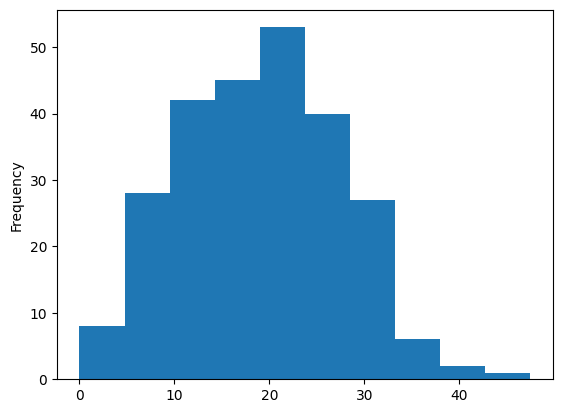

In [105]:
df.BodyFat.plot(kind="hist");

Segundo a documentação do `scipy`, o `normaltest` consiste em um Teste de Hipóteses com a seguinte Hipótese nula:

$H_0$: Os dados seguem uma distribuição normal

Para testes em que o `p-value` é baixo (aqui considerado `p-value = 0.05`, existem evidências para se rejeitar $H_0$. Porém, a documentação alerta que o caso contrário *não* é evidência suficiente para se aceitar $H_0$.

In [106]:
from scipy.stats import normaltest

res = normaltest(df.BodyFat)
rejeita_h0 = res.pvalue <= 0.05

print(f'p-value = {res.pvalue}')
print(f'Rejeita H0? => {rejeita_h0}')

p-value = 0.3072624024933559
Rejeita H0? => False


Outro teste que pode ser feito para analisar se uma distribuição é normal ou não é a Análise de Resíduos. A ideia por trás do teste consiste em verificar se a diferença entre um ponto e a média tem tendência linear. Caso seja, assume-se que a distribuição é normal. Neste caso, existe evidência de que a coluna `BodyFat` segue uma distribuição normal.

(fonte: https://online.stat.psu.edu/stat501/lesson/4/4.6)

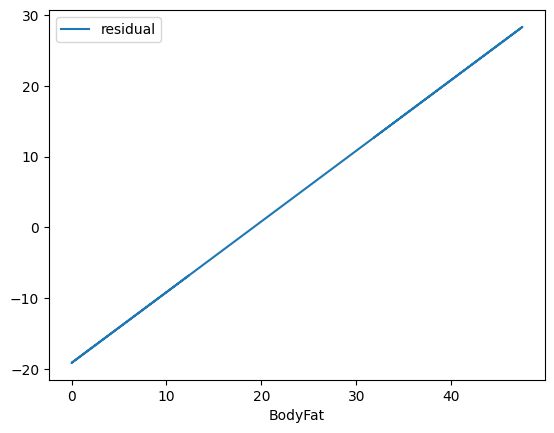

In [107]:
def residual(media: float, valor: float) -> float: return media - valor
media_bodyfat = df.BodyFat.mean()
df['residual'] = df.BodyFat.apply(residual, args=(media_bodyfat, ))
df.plot('BodyFat','residual');

Um possível filtro a ser aplicado aos dados é o de idade, ou seja, verificar se a porcentagem de gordura corporal é afetada pela faixa etária. Vamos verificar, então, se pessoas com idade acima de 60 anos tendem a ter um percentual de gordura diferente da amostra completa.

In [108]:
df_filtered = df[df.Age > 60].copy()
df_filtered.sample(5)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Weight_SI,Height_SI,IMC,residual
235,1.0563,18.6,62,168.75,67.50,38.3,104.7,95.6,93.7,54.4,37.1,22.7,30.3,26.3,18.3,75.9375,171.450,166.666667,-0.550794
85,1.0386,26.6,67,167.00,67.50,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2,75.1500,171.450,164.938272,7.449206
79,1.0560,18.8,66,171.25,69.25,37.4,102.7,98.6,100.2,56.5,39.3,22.7,30.3,28.7,19.0,77.0625,175.895,160.695435,-0.350794
86,1.0648,14.9,72,157.75,67.25,37.7,97.5,88.1,96.9,57.2,37.7,21.8,32.6,28.0,18.8,70.9875,170.815,156.963005,-4.250794
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,85.8375,179.070,172.702580,6.849206


In [109]:
df_filtered.shape

(35, 19)

In [110]:
avg_bodyfat_filtered = df_filtered.BodyFat.mean()
avg_bodyfat = df.BodyFat.mean()

print(f"""
Total: média = {avg_bodyfat}
Filtrado: média = {avg_bodyfat_filtered}
      """)


Total: média = 19.150793650793652
Filtrado: média = 24.31428571428571
      


Nota-se que a média do grupo filtrado é maior que a média do grupo total. No entanto, é possível dizer, estatisticamente, que estas médias são de fato diferentes?

Para responder isso, podemos fazer um teste com as seguintes hipóteses:

* $H_0$: $\mu_1 = \mu_2$
* $H_1$: $\mu_1 \neq \mu_2$

Em que:

* $\mu_1$: média do grupo total (`df`)
* $\mu_2$: média do grupo filtraod (`df_filtered`)

Trata-se então de um teste bicaudal, pois a hipótese alternativa ($H_1$) considera tanto os valores à direita e à esquerda da média. Iremos assumir `p-value` = 5% como sendo o limite de aceitação ou rejeição de $H_0$.

fonte: https://www.inf.ufsc.br/~andre.zibetti/probabilidade/teste-de-hipoteses.html


O resultado do Teste de Hipóteses foi a da Rejeição de $H_0$, o que significar dizer que existem evidências estatísticas significativas para afirmar que a média de gordura corporal do grupo filtrado (idade > 60 anos) é maior que a média do grupo completo.

In [111]:
# Teste de hipóteses

from scipy.stats import norm

def sp_amostral(amostra_a: list, amostra_b:list) -> float:
  aux1 = (amostra_a[3]-1/(amostra_a[3]+amostra_b[3]-2))*amostra_a[2]
  aux2 = (amostra_b[3]-1/(amostra_a[3]+amostra_b[3]-2))*amostra_b[2]
  return (aux1 + aux2)**0.5


def test_t(amostra_a: list, amostra_b:list) -> float:
  sp = sp_amostral(amostra_a, amostra_b)
  return (amostra_a[0] - amostra_b[0])/(sp*(1/amostra_a[3] + 1/amostra_b[3])**0.5)


mu1 = df.BodyFat.mean()
std1 = df.BodyFat.std()
var1 = df.BodyFat.var()
n1 = df.shape[0]
amostra_a = [mu1, std1, var1, n1]

mu2 = df_filtered.BodyFat.mean()
std2 = df_filtered.BodyFat.std()
var2 = df_filtered.BodyFat.var()
n2 = df_filtered.shape[0]
amostra_b = [mu2, std2, var2, n2]

pvalue = 0.05
threshold = norm.ppf(pvalue/2)

teste = test_t(amostra_a, amostra_b)
rejeita_h0 = teste > threshold

print(f"""
p-value = {pvalue}
limite de aceitação = {threshold}
resultado do teste = {teste}
---------------------------------
Rejeita H0? => {rejeita_h0}
      """)


p-value = 0.05
limite de aceitação = -1.9599639845400545
resultado do teste = -0.20700633123144288
---------------------------------
Rejeita H0? => True
      


# Questão 5
Pesquisas eleitorais envolvem, quase sempre, um imenso problema estatístico: a menos que você esteja interessado nas eleições municipais de uma cidade com 5 mil habitantes, você nunca terá o tempo e o orçamento necessários para entrevistar 100% dos potenciais eleitores. Imagine só, como poderíamos entrevistar mais de 100 milhões de pessoas para tentar prever com exatidão o resultado das eleições presidenciais do Brasil? Utilizando os seus conhecimentos sobre amostragem estatística, descreva como você faria para selecionar, por exemplo, 20 mil pessoas para serem entrevistadas, com o objetivo de produzir uma amostra que seja minimamente suficiente para predizer as intenções de voto de um grupo tão maior de pessoas quanto no caso das eleições presidenciais brasileiras. Explique, também, por que você tomou
essa decisão e diga qual é o nome do tipo de amostragem estatística que você utilizou.

Considerando que a população de onde seria extraída a amostra é todo o eleitorado brasileiro, uma provável abordagem adequada seria a utilização de uma amostragem estratificada. Isso porque a extensão territorial do país é muito grande e há significativa diferença cultural entre cada uma das regiões e mesmo entre estados de uma mesma região, além de diversidade de gênero, nível educacional e de renda, religião, cor, idade - então a nossa amostra seria composta por representantes desses segmentos.

A representação de cada estrato (região, renda, gênero, idade, etc) seria proporcional à representação de cada um deles na população total (eleitores aptos a votar) e o tamanho da amostra de cada estrato seria correspondente ao seu “peso” no número de eleitores do país - por exemplo, se 22% da população tem entre 16 e 20 anos, essa seria a proporção desse estrato na amostra que participaria da pesquisa.

Contudo, dentro de cada estrato do eleitorado seria necessário determinar a forma de escolha das pessoas que iriam participar. Assim, a técnica que se mostra mais adequada é a seleção aleatória simples, de maneira que todas as pessoas de cada um dos estratos definidos teriam a mesma chance de serem escolhidas (sem reposição), de forma aleatória, garantindo que cada eleitor teria a mesma chance de ser selecionado para a pesquisa.

Após isso, seria feita a junção das amostras de cada um dos estratos, formados por eleitores selecionados de forma aleatória em cada um daqueles segmentos, para formar a amostra final de 20 mil eleitores, conforme exemplo proposto no enunciado, para realização da pesquisa de intenções de voto, afastando, assim, resultados enviesados e aumentando a confiabilidade do trabalho.

Por fim, merece destaque o fato de que quanto maior a amostra, menor será, ao menos em tese, a margem de erro da pesquisa. Em outros termos, a margem de erro tende a zero à medida que cresce a nossa amostra para realização da pesquisa, de maneira que, se por um lado uma amostra muito grande pode representar custos vultosos, uma amostra pequena fatalmente traria um resultado impreciso. Assim, deve haver um equilíbrio no momento da definição da população, sem perder de vista a tendência a zero mencionada anteriormente.
